In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import csv

In [50]:
data = []
tempvalues = []

with open('/mnt/c/Users/lukek/OneDrive/Desktop/Computer Science Honours/RL/RL-Labs/Assignment/model_1/logs/Episode Ending actions.csv', 'r') as file:
    for line in file:
      
        # Remove brackets and split based on whitespace
        values = line.strip().replace('[', '').replace(']', '').replace('"','').split()
        if len(values)!= 6:
            tempvalues.extend(values)

        else:
            if len(tempvalues)==6:
                data.append([float(num) for num in tempvalues])
                tempvalues = []
            else:    
                data.append([float(num) for num in values])

data = np.array(data)

data = data[[len(row) == 6 for row in data]]


bad_first_three = data[:, :3]
bad_last_three = data[:, 3:]



In [60]:
good_data = []

with open('/mnt/c/Users/lukek/OneDrive/Desktop/Computer Science Honours/RL/RL-Labs/Assignment/model_1/logs/Good actions.csv', 'r') as file:
    for line in file:
       
        # Remove brackets and split based on whitespace
        values = line.strip().replace('[', '').replace(']', '').split(",")
        
        good_data.append([float(num) for num in values])
good_data = np.array(good_data)
good_first_three = good_data[:, :3]
good_last_three = good_data[:, 3:]

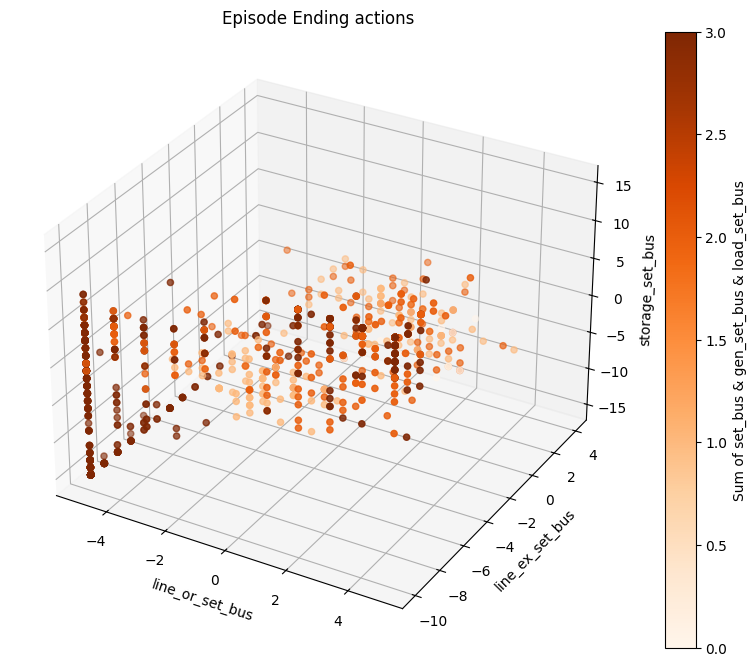

In [71]:

# Assume `data` is already loaded as in your provided code
bad_first_three = data[:, :3]
bad_last_three = data[:, 3:]

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Use the first three values to determine the colors
# For simplicity, let's use the sum of the first three values to determine the color
colors = np.sum(bad_first_three, axis=1)

# Scatter plot of the last three values, with colors representing the sum of the first three values
sc = ax.scatter(bad_last_three[:, 0], bad_last_three[:, 1], bad_last_three[:, 2], 
                c=colors, cmap='Oranges', marker='o')

# Add color bar to interpret the color coding
plt.colorbar(sc, ax=ax, label='Sum of set_bus & gen_set_bus & load_set_bus')


# Add labels and title
ax.set_title('Episode Ending actions')
ax.set_xlabel('line_or_set_bus')
ax.set_ylabel('line_ex_set_bus')
ax.set_zlabel('storage_set_bus')

# Show the plot
plt.show()

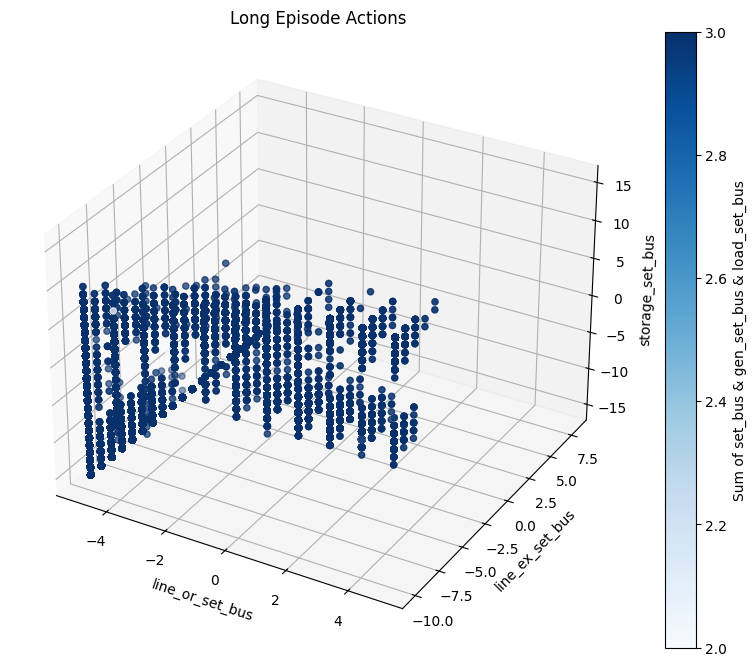

In [70]:

# Assume `data` is already loaded as in your provided code
good_first_three = good_data[:, :3]
good_last_three = good_data[:, 3:]

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Use the first three values to determine the colors
# For simplicity, let's use the sum of the first three values to determine the color
colors = np.sum(good_first_three, axis=1)

# Scatter plot of the last three values, with colors representing the sum of the first three values
sc = ax.scatter(good_last_three[:, 0], good_last_three[:, 1], good_last_three[:, 2], 
                c=colors, cmap='Blues', marker='o')

# Add color bar to interpret the color coding
plt.colorbar(sc, ax=ax, label='Sum of set_bus & gen_set_bus & load_set_bus')

# Add labels and title
ax.set_title('Long Episode Actions')
ax.set_xlabel('line_or_set_bus')
ax.set_ylabel('line_ex_set_bus')
ax.set_zlabel('storage_set_bus')


# Show the plot
plt.show()

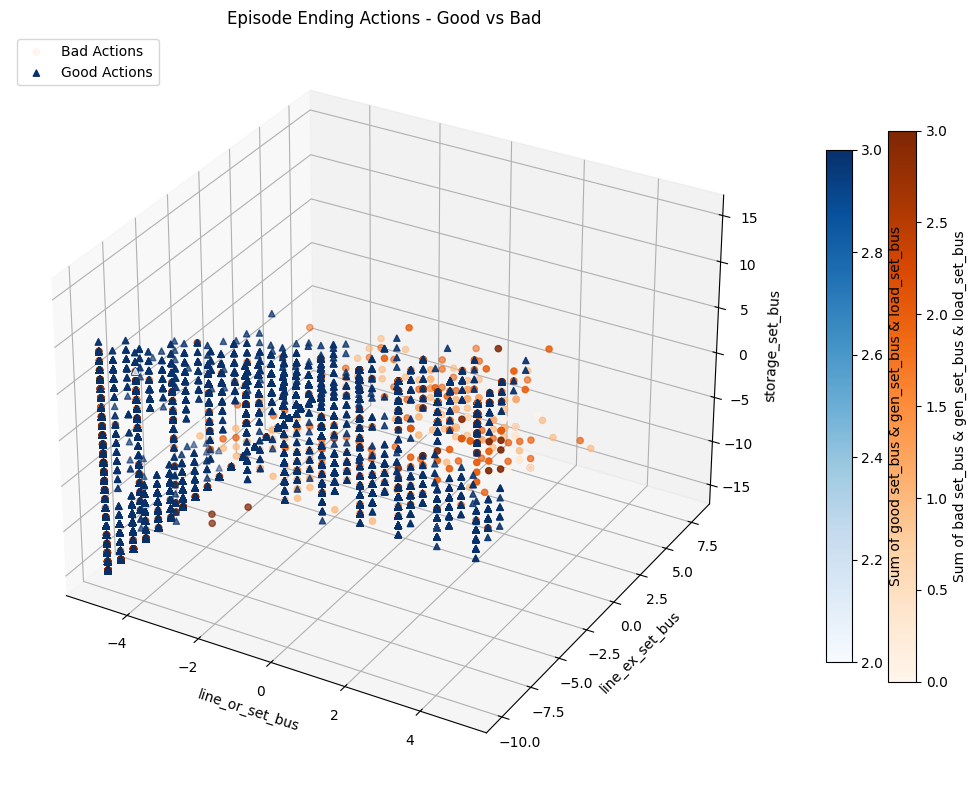

In [72]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Colors based on the sum of the first three values
bad_colors = np.sum(bad_first_three, axis=1)
good_colors = np.sum(good_first_three, axis=1)

# Scatter plot for bad_last_three with 'Oranges' colormap
sc_bad = ax.scatter(bad_last_three[:, 0], bad_last_three[:, 1], bad_last_three[:, 2], 
                    c=bad_colors, cmap='Oranges', marker='o', label='Bad Actions')

# Scatter plot for good_last_three with 'Blues' colormap
sc_good = ax.scatter(good_last_three[:, 0], good_last_three[:, 1], good_last_three[:, 2], 
                     c=good_colors, cmap='Blues', marker='^', label='Good Actions')

# Add color bars for each scatter plot to interpret the color coding
cbar_bad = plt.colorbar(sc_bad, ax=ax, fraction=0.03, pad=0.04)
cbar_good = plt.colorbar(sc_good, ax=ax, fraction=0.03, pad=0.08)

cbar_bad.set_label('Sum of bad set_bus & gen_set_bus & load_set_bus', fontsize=10)
cbar_good.set_label('Sum of good set_bus & gen_set_bus & load_set_bus', fontsize=10)

# Add labels, title, and legend
ax.set_title('Episode Ending Actions - Good vs Bad')
ax.set_xlabel('line_or_set_bus')
ax.set_ylabel('line_ex_set_bus')
ax.set_zlabel('storage_set_bus')
ax.legend(loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

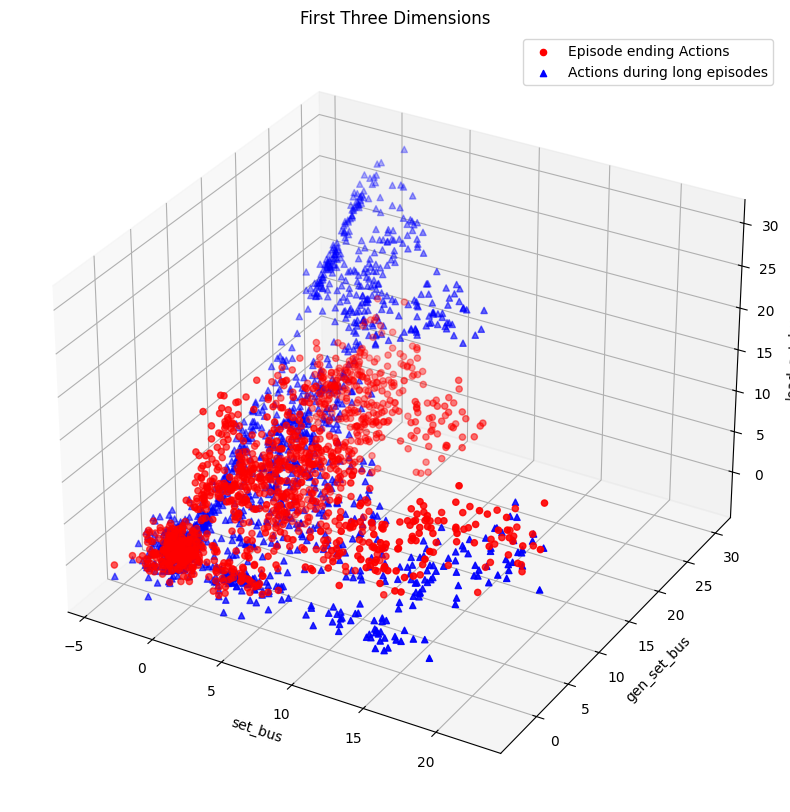

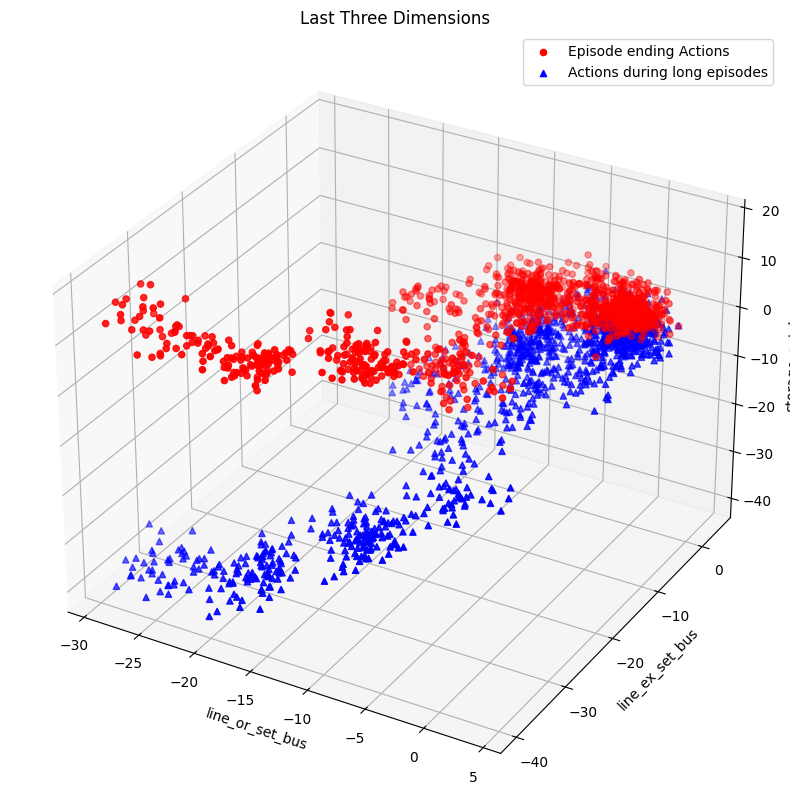

In [48]:

fig1 = plt.figure(figsize=(10, 10))
ax1 = fig1.add_subplot(111, projection='3d')
ax1.scatter(bad_first_three[:, 0], bad_first_three[:, 1], bad_first_three[:, 2], c='red', marker='o', label="Episode ending Actions")
ax1.scatter(good_first_three[:,0], good_first_three[:, 1], good_first_three[:,1], c = 'blue', marker="^", label= "Actions during long episodes")

ax1.set_title('First Three Dimensions')
ax1.set_xlabel('set_bus')
ax1.set_ylabel('gen_set_bus')
ax1.set_zlabel('load_set_bus')
ax1.legend()


fig2 = plt.figure(figsize=(10, 10))
ax2 = fig2.add_subplot(111, projection='3d')
ax2.scatter(bad_last_three[:, 0], bad_last_three[:, 1], bad_last_three[:, 2], c='red', marker='o',  label="Episode ending Actions")
ax2.scatter(good_last_three[:,0], good_last_three[:, 1], good_last_three[:,1], c = 'blue', marker="^", label= "Actions during long episodes")

ax2.set_title('Last Three Dimensions')
ax2.set_xlabel('line_or_set_bus')
ax2.set_ylabel('line_ex_set_bus')
ax2.set_zlabel('storage_set_bus')
ax2.legend()

plt.show()

## Multi-agent

/mnt/c/Users/lukek/OneDrive/Desktop/Computer Science Honours/RL/RL-Assignment/src/actor_critic/Multi agent logs/Multiagent_rewards_2a.txt
Max reward: 2638.2605485767126
Max Length: 8064
Number of times:  61


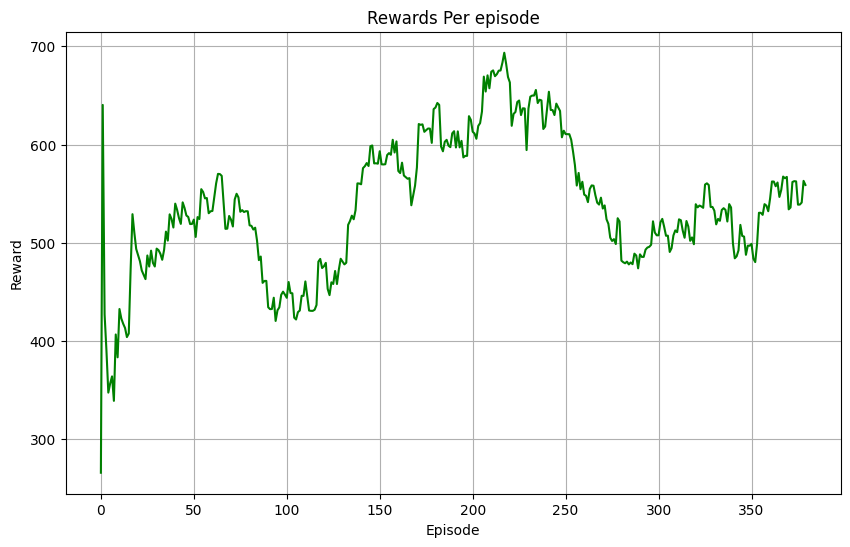

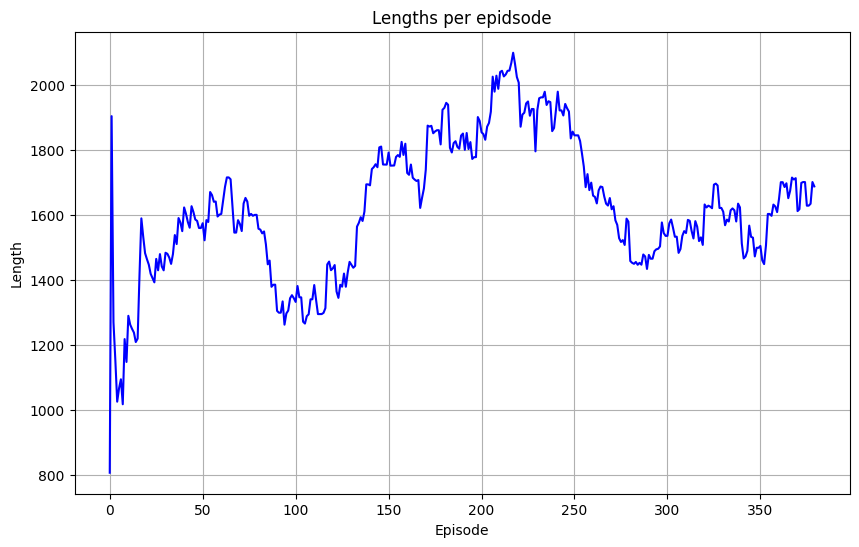

In [49]:
paths = ["/mnt/c/Users/lukek/OneDrive/Desktop/Computer Science Honours/RL/RL-Assignment/src/actor_critic/Multi agent logs/Multiagent_rewards_2a.txt",
         "/mnt/c/Users/lukek/OneDrive/Desktop/Computer Science Honours/RL/RL-Assignment/src/actor_critic/Multi agent logs/Multiagent_length_2a.txt"]
def plot_reward_and_length(paths):
    rewards = []
    lengths = []
    print(paths[0])
    with open(paths[0], 'r') as file:
        for line in file:
            value = float(line.strip())
            rewards.append(value)
    
    with open(paths[1], 'r') as newfile:
            for line in newfile:
                value = int(line.strip())
                lengths.append(value)
    print("Max reward:", np.max(rewards))
    print("Max Length:", np.max(lengths))
    print("Number of times: ", np.sum(np.array(rewards) > 1000))
    n_eps = len(rewards)
    mean_100ep_rewards = np.array([np.mean(rewards[-n_eps +i -49:-(n_eps - i) + 1]) if i != n_eps - 1
                                   else np.mean(rewards[-n_eps +i -49:]) for i in range(n_eps)])
    std_100_ep_rewards = np.array([np.std(rewards[-n_eps +i -49:-(n_eps - i) + 1]) if i != n_eps - 1
                                   else np.std(rewards[-n_eps +i -49:]) for i in range(n_eps)])

    mean_100ep_lengths = np.array([np.mean(lengths[-n_eps +i -49:-(n_eps - i) + 1]) if i != n_eps - 1
                                   else np.mean(lengths[-n_eps +i -49:]) for i in range(n_eps)])
    std_100_ep_lengths = np.array([np.std(lengths[-n_eps +i -49:-(n_eps - i) + 1]) if i != n_eps - 1
                                   else np.std(lengths[-n_eps +i -49:]) for i in range(n_eps)])


    plt.figure(figsize=(10, 6))
    plt.plot(range(n_eps), mean_100ep_rewards,color = 'green')
    # plt.fill_between(range(n_eps),  mean_100ep_rewards - std_100_ep_rewards, mean_100ep_rewards + std_100_ep_rewards,
    #                     alpha = 0.4, color = 'green')
    plt.title('Rewards Per episode')
    plt.xlabel('Episode')
    plt.ylabel('Reward')
    plt.grid()
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.plot(mean_100ep_lengths, linestyle='-', color='b')
    plt.title('Lengths per epidsode')
    plt.xlabel('Episode')
    plt.ylabel('Length')
    plt.grid()
    plt.show()


plot_reward_and_length(paths)



/mnt/c/Users/lukek/OneDrive/Desktop/Computer Science Honours/RL/RL-Assignment/src/actor_critic/Multi agent logs/Multiagent_rewards.txt
Max reward: 2638.2605485767126
Max Length: 8064
Number of times:  87


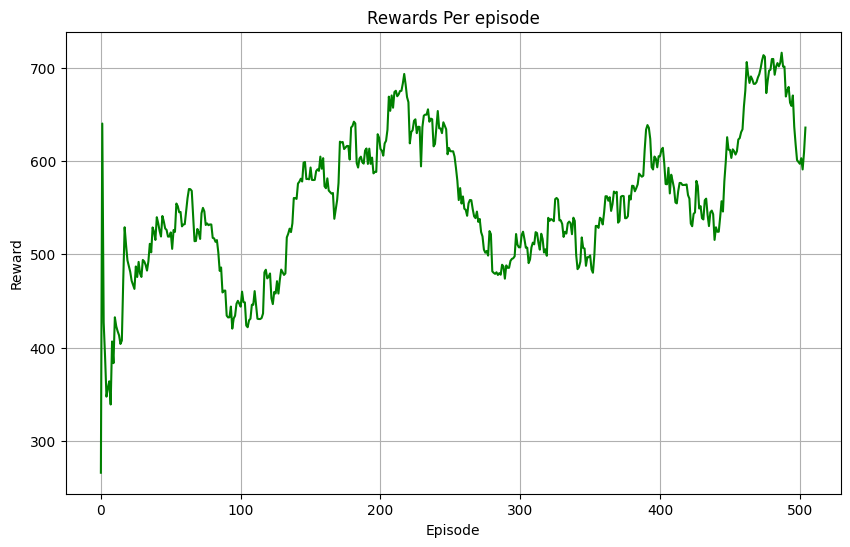

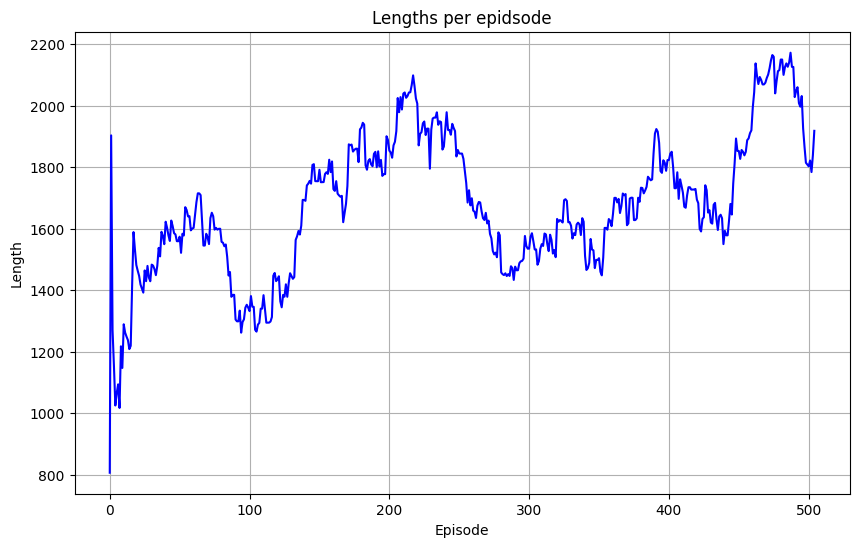

In [50]:
newpaths = ["/mnt/c/Users/lukek/OneDrive/Desktop/Computer Science Honours/RL/RL-Assignment/src/actor_critic/Multi agent logs/Multiagent_rewards.txt",
         "/mnt/c/Users/lukek/OneDrive/Desktop/Computer Science Honours/RL/RL-Assignment/src/actor_critic/Multi agent logs/Multiagent_length.txt"]
plot_reward_and_length(newpaths)

In [37]:
def read_reward_files_three(path1,path2,path3):
    
    step1 = []
    value1 = []
    
    step2 = []
    value2 = []
    
    step3 = []
    value3 = []

# Open and read the CSV file
    with open(path1, 'r') as file:
        reader = csv.reader(file)
        
        # Skip the header row
        next(reader)
        
        # Iterate through each row and store the first and second values
        for row in reader:
            step1.append(int(row[0]))       # First value (step)
            value1.append(float(row[1]))    # Second value (value)

    with open(path2, 'r') as file:
        reader = csv.reader(file)
        
        # Skip the header row
        next(reader)
        
        # Iterate through each row and store the first and second values
        for row in reader:
            step2.append(int(row[0]))       # First value (step)
            value2.append(float(row[1]))    # Second value (value)
    
    with open(path3, 'r') as file:
        reader = csv.reader(file)
        
        next(reader)
        
        for row in reader:
            step3.append(int(row[0]))       
            value3.append(float(row[1]))

    

    print("Max Reward of Discrete Action space ", np.max(value1))
    print("Max Reward of Multi Discrete Action space ", np.max(value2))
    print("Max Reward of Continuous Action Space ", np.max(value3))

    n_eps = len(value1)
    mean_100ep_rewards = np.array([np.mean(value1[-n_eps +i -99:-(n_eps - i) + 1]) if i != n_eps - 1
                                   else np.mean(value1[-n_eps +i -99:]) for i in range(n_eps)])
    n_eps = len(value2)
    otherrewards = np.array([np.mean(value2[-n_eps +i -99:-(n_eps - i) + 1]) if i != n_eps - 1
                                   else np.mean(value2[-n_eps +i -99:]) for i in range(n_eps)])
    
    n_eps = len(value3)
    thirdrewards = np.array([np.mean(value3[-n_eps +i -99:-(n_eps - i) + 1]) if i != n_eps - 1
                                   else np.mean(value3[-n_eps +i -99:]) for i in range(n_eps)])
    
    
    f = plt.figure(figsize=(10, 6))
    plt.plot(step1, mean_100ep_rewards,color = 'green', label="Discrete Action Space")
    plt.plot(step2, otherrewards,color = 'red', label="Multi-Discrete Action feature")
    plt.plot(step3, thirdrewards,color = 'blue', label="Continuous Action Space")
   
    #plt.plot(mean_100ep_rewards,color = 'blue')
    # plt.fill_between(range(n_eps),  mean_100ep_rewards - std_100_ep_rewards, mean_100ep_rewards + std_100_ep_rewards,
    #                     alpha = 0.4, color = 'green')
    plt.title('Rewards During Training')
    plt.xlabel('step')
    plt.ylabel('Reward')
    plt.legend()
    plt.grid()
    plt.show()
    
    f.savefig('Baseline_episode_rewards.pdf', bbox_inches='tight')


def read_length_files_three(path1,path2,path3):
    
    step1 = []
    value1 = []
    
    step2 = []
    value2 = []
    
    step3 = []
    value3 = []
# Open and read the CSV file
    with open(path1, 'r') as file:
        reader = csv.reader(file)
        
        # Skip the header row
        next(reader)
        
        # Iterate through each row and store the first and second values
        for row in reader:
            step1.append(int(row[0]))       # First value (step)
            value1.append(float(row[1]))    # Second value (value)

    with open(path2, 'r') as file:
        reader = csv.reader(file)
        
        # Skip the header row
        next(reader)
        
        # Iterate through each row and store the first and second values
        for row in reader:
            step2.append(int(row[0]))       # First value (step)
            value2.append(float(row[1]))    # Second value (value)

    with open(path3, 'r') as file:
        reader = csv.reader(file)
        
        # Skip the header row
        next(reader)
        
        # Iterate through each row and store the first and second values
        for row in reader:
            step3.append(int(row[0]))       # First value (step)
            value3.append(float(row[1]))    # Second value (value)
    
    print("Max Length of Discrete Action space ", np.max(value1))
    print("Max Length of Multi Discrete Action space ", np.max(value2))
    print("Max Length of Continuous Action space ", np.max(value3))
    n_eps = len(value1)
    mean_100ep_rewards = np.array([np.mean(value1[-n_eps +i -99:-(n_eps - i) + 1]) if i != n_eps - 1
                                   else np.mean(value1[-n_eps +i -99:]) for i in range(n_eps)])
    n_eps = len(value2)
    otherrewards = np.array([np.mean(value2[-n_eps +i -99:-(n_eps - i) + 1]) if i != n_eps - 1
                                   else np.mean(value2[-n_eps +i -99:]) for i in range(n_eps)])
    n_eps = len(value3)
    thirdrewards = np.array([np.mean(value3[-n_eps +i -99:-(n_eps - i) + 1]) if i != n_eps - 1
                                   else np.mean(value3[-n_eps +i -99:]) for i in range(n_eps)])
    f =plt.figure(figsize=(10, 6))
    plt.plot(step1, mean_100ep_rewards,color = 'green', label="Discrete Action Space")
    plt.plot(step2, otherrewards, color = 'red', label="Multi-Discrete Action Space")
    plt.plot(step3, thirdrewards, color = 'blue', label="Continuous Action Space")
    #plt.plot(mean_100ep_rewards,color = 'blue')
    # plt.fill_between(range(n_eps),  mean_100ep_rewards - std_100_ep_rewards, mean_100ep_rewards + std_100_ep_rewards,
    #                     alpha = 0.4, color = 'green')
    plt.title('Episode Lengths during training')
    plt.xlabel('step')
    plt.ylabel('Length')
    plt.legend()
    plt.grid()
    plt.show()
    
    f.savefig('Baseline_episode_lengths.pdf', bbox_inches='tight')

## 3 Action Spaces

Max Reward of Discrete Action space  851.5497436523438
Max Reward of Multi Discrete Action space  1008.9953002929688
Max Reward of Continuous Action Space  620.75830078125


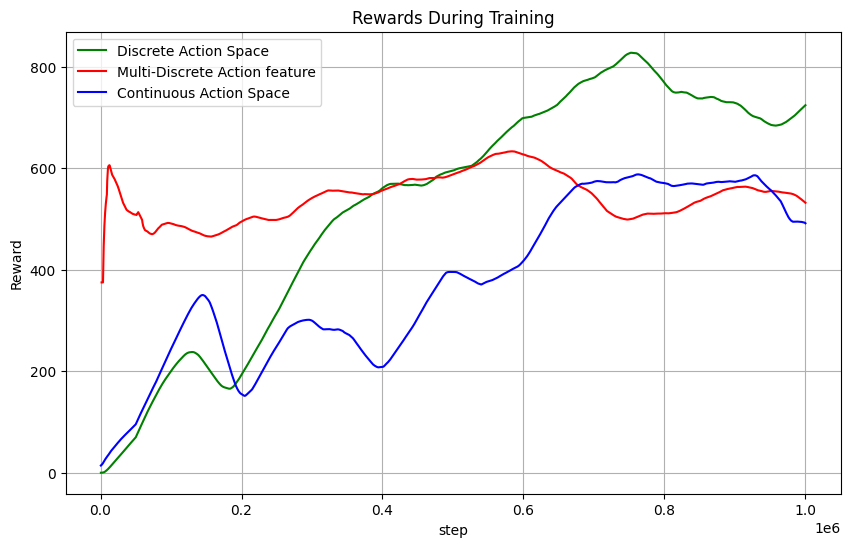

Max Length of Discrete Action space  2457.1201171875
Max Length of Multi Discrete Action space  3064.333251953125
Max Length of Continuous Action space  1794.969970703125


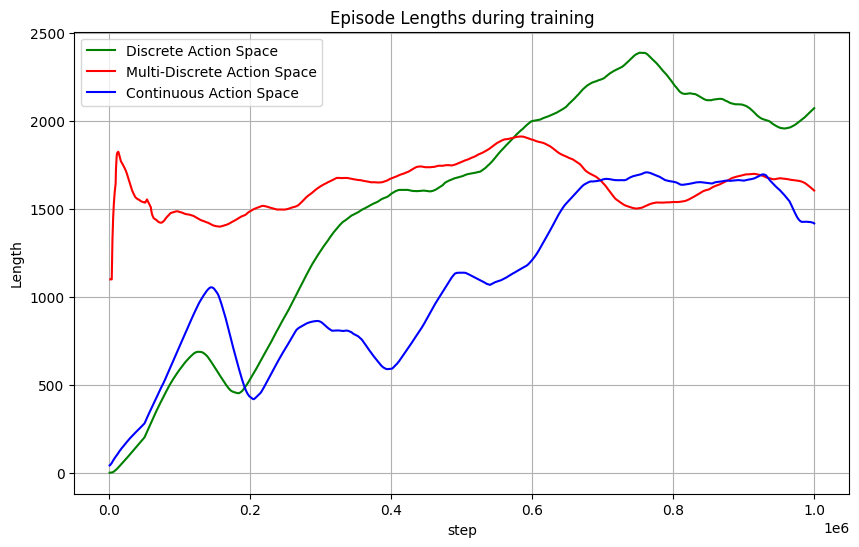

In [38]:


read_reward_files_three("/mnt/c/Users/lukek/OneDrive/Desktop/Computer Science Honours/RL/RL-Assignment/src/actor_critic/Extracted csvs/rollout_ep_rew_mean_discrete.csv",
           "/mnt/c/Users/lukek/OneDrive/Desktop/Computer Science Honours/RL/RL-Assignment/src/actor_critic/Extracted csvs/rollout_ep_rew_mean_All_ao.csv",
           "/mnt/c/Users/lukek/OneDrive/Desktop/Computer Science Honours/RL/RL-Assignment/src/actor_critic/Extracted csvs/rollout_ep_rew_mean_cont.csv")

read_length_files_three("/mnt/c/Users/lukek/OneDrive/Desktop/Computer Science Honours/RL/RL-Assignment/src/actor_critic/Extracted csvs/rollout_ep_len_mean_discrete.csv",
           "/mnt/c/Users/lukek/OneDrive/Desktop/Computer Science Honours/RL/RL-Assignment/src/actor_critic/Extracted csvs/rollout_ep_len_mean_MDA_All_ao.csv",
           "/mnt/c/Users/lukek/OneDrive/Desktop/Computer Science Honours/RL/RL-Assignment/src/actor_critic/Extracted csvs/rollout_ep_len_mean_cont.csv")
            
                        

Max Length of Discrete Action space  2457.1201171875
Max Length of Multi Discrete Action space  3064.333251953125
Max Length of Continuous Action space  1794.969970703125


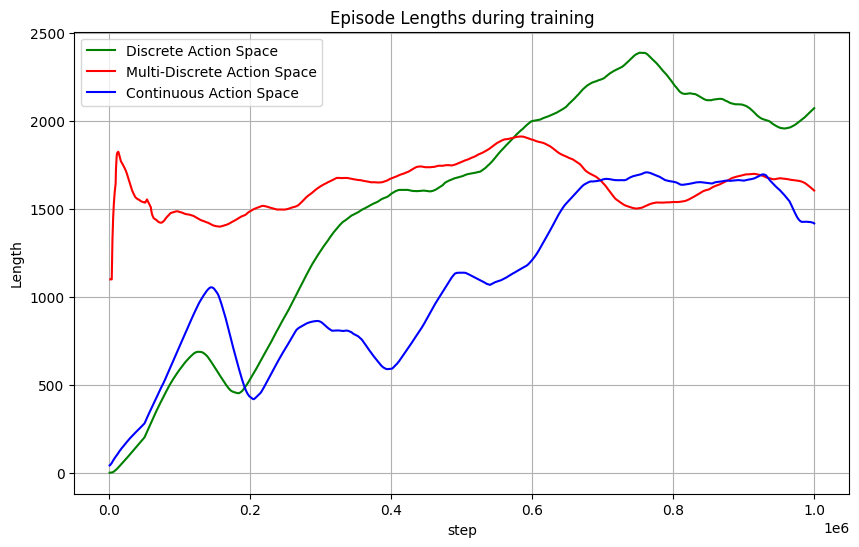

## Continuous Action Space vs Clipped Continuous Action Space

In [35]:
def read_reward_files_two(path1,path2):
    
    step1 = []
    value1 = []
    
    step2 = []
    value2 = []
    

# Open and read the CSV file
    with open(path1, 'r') as file:
        reader = csv.reader(file)
        
        # Skip the header row
        next(reader)
        
        # Iterate through each row and store the first and second values
        for row in reader:
            step1.append(int(row[0]))       # First value (step)
            value1.append(float(row[1]))    # Second value (value)

    with open(path2, 'r') as file:
        reader = csv.reader(file)
        
        # Skip the header row
        next(reader)
        
        # Iterate through each row and store the first and second values
        for row in reader:
            step2.append(int(row[0]))       # First value (step)
            value2.append(float(row[1]))    # Second value (value)
    
   

    

    print("Max Reward of Continuous Action Space ", np.max(value1))
    print("Max Reward of Clipped and Rounded Continuous Action Space ", np.max(value2))
 

    n_eps = len(value1)
    mean_100ep_rewards = np.array([np.mean(value1[-n_eps +i -99:-(n_eps - i) + 1]) if i != n_eps - 1
                                   else np.mean(value1[-n_eps +i -99:]) for i in range(n_eps)])
    n_eps = len(value2)
    otherrewards = np.array([np.mean(value2[-n_eps +i -99:-(n_eps - i) + 1]) if i != n_eps - 1
                                   else np.mean(value2[-n_eps +i -99:]) for i in range(n_eps)])
    
    
    
    
    f = plt.figure(figsize=(10, 6))
    plt.plot(step1, mean_100ep_rewards,color = 'green', label="Continuous Action Space")
    plt.plot(step2, otherrewards,color = 'red', label="Clipped and Rounded Continuous Action feature")
   
    #plt.plot(mean_100ep_rewards,color = 'blue')
    # plt.fill_between(range(n_eps),  mean_100ep_rewards - std_100_ep_rewards, mean_100ep_rewards + std_100_ep_rewards,
    #                     alpha = 0.4, color = 'green')
    plt.title('Rewards During Training')
    plt.xlabel('step')
    plt.ylabel('Reward')
    plt.legend()
    plt.grid()
    plt.show()
    
    f.savefig('Continuous_reward_comparison.pdf', bbox_inches='tight')


def read_length_files_two(path1,path2):
    
    step1 = []
    value1 = []
    
    step2 = []
    value2 = []
    
  
# Open and read the CSV file
    with open(path1, 'r') as file:
        reader = csv.reader(file)
        
        # Skip the header row
        next(reader)
        
        # Iterate through each row and store the first and second values
        for row in reader:
            step1.append(int(row[0]))       # First value (step)
            value1.append(float(row[1]))    # Second value (value)

    with open(path2, 'r') as file:
        reader = csv.reader(file)
        
        # Skip the header row
        next(reader)
        
        # Iterate through each row and store the first and second values
        for row in reader:
            step2.append(int(row[0]))       # First value (step)
            value2.append(float(row[1]))    # Second value (value)

    
    print("Max Length of Conitnuous Action Space ", np.max(value1))
    print("Max Length of Clipped and Rounded Continuous Action space ", np.max(value2))
    n_eps = len(value1)
    mean_100ep_rewards = np.array([np.mean(value1[-n_eps +i -99:-(n_eps - i) + 1]) if i != n_eps - 1
                                   else np.mean(value1[-n_eps +i -99:]) for i in range(n_eps)])
    n_eps = len(value2)
    otherrewards = np.array([np.mean(value2[-n_eps +i -99:-(n_eps - i) + 1]) if i != n_eps - 1
                                   else np.mean(value2[-n_eps +i -99:]) for i in range(n_eps)])
    
    f =plt.figure(figsize=(10, 6))
    plt.plot(step1, mean_100ep_rewards,color = 'green', label="Continuous Action Space")
    plt.plot(step2, otherrewards, color = 'red', label="Clipped and Rounded Continuous Action Space")
    #plt.plot(mean_100ep_rewards,color = 'blue')
    # plt.fill_between(range(n_eps),  mean_100ep_rewards - std_100_ep_rewards, mean_100ep_rewards + std_100_ep_rewards,
    #                     alpha = 0.4, color = 'green')
    plt.title('Episode Lengths during training')
    plt.xlabel('step')
    plt.ylabel('Length')
    plt.legend()
    plt.grid()
    plt.show()
    
    f.savefig('Continuous_length_comparisonpdf', bbox_inches='tight')

Max Reward of Continuous Action Space  620.75830078125
Max Reward of Clipped and Rounded Continuous Action Space  569.1712646484375


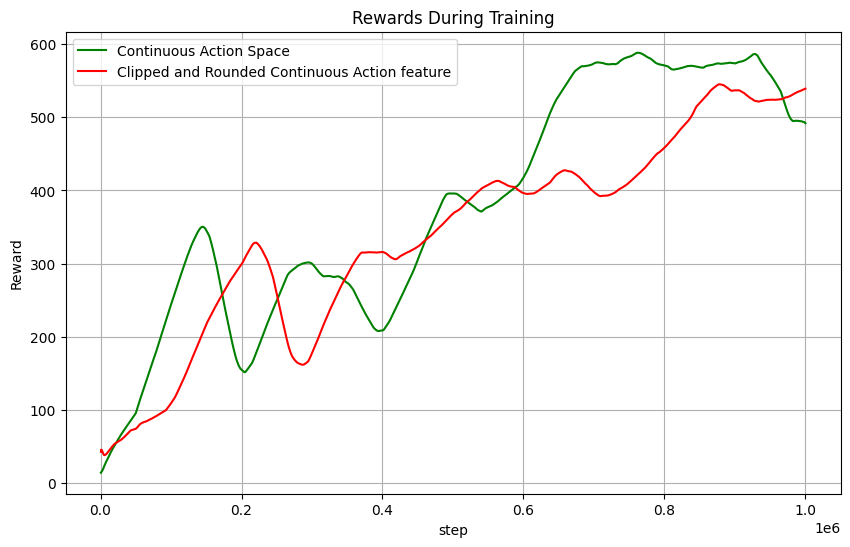

Max Reward of Continuous Action Space  1794.969970703125
Max Reward of Clipped and Rounded Continuous Action Space  1693.550048828125


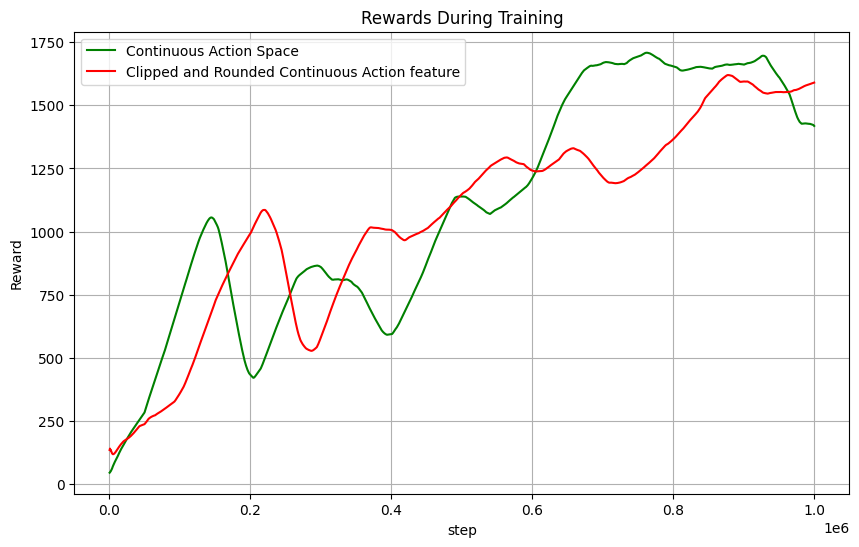

In [36]:
read_reward_files_two("/mnt/c/Users/lukek/OneDrive/Desktop/Computer Science Honours/RL/RL-Assignment/src/actor_critic/Extracted csvs/rollout_ep_rew_mean_cont.csv",
           "/mnt/c/Users/lukek/OneDrive/Desktop/Computer Science Honours/RL/RL-Assignment/src/actor_critic/Extracted csvs/rollout_ep_rew_mean_clip_cont.csv")

read_reward_files_two("/mnt/c/Users/lukek/OneDrive/Desktop/Computer Science Honours/RL/RL-Assignment/src/actor_critic/Extracted csvs/rollout_ep_len_mean_cont.csv",
           "/mnt/c/Users/lukek/OneDrive/Desktop/Computer Science Honours/RL/RL-Assignment/src/actor_critic/Extracted csvs/rollout_ep_len_mean_clip_cont.csv")

## Different MDA Action Features

In [28]:
def read_reward_files_five(path1,path2,path3, path4, path5):
    
    step1 = []
    value1 = []
    
    step2 = []
    value2 = []
    
    step3 = []
    value3 = []

    step4 = []
    value4 = []

    step5 = []
    value5 = []
# Open and read the CSV file
    with open(path1, 'r') as file:
        reader = csv.reader(file)
        
        # Skip the header row
        next(reader)
        
        # Iterate through each row and store the first and second values
        for row in reader:
            step1.append(int(row[0]))       # First value (step)
            value1.append(float(row[1]))    # Second value (value)

    with open(path2, 'r') as file:
        reader = csv.reader(file)
        
        # Skip the header row
        next(reader)
        
        # Iterate through each row and store the first and second values
        for row in reader:
            step2.append(int(row[0]))       # First value (step)
            value2.append(float(row[1]))    # Second value (value)
    
    with open(path3, 'r') as file:
        reader = csv.reader(file)
        
        next(reader)
        
        for row in reader:
            step3.append(int(row[0]))       
            value3.append(float(row[1]))

    with open(path4, 'r') as file:
        reader = csv.reader(file)
        
        next(reader)
        
        for row in reader:
            step4.append(int(row[0]))       
            value4.append(float(row[1]))
    
    with open(path5, 'r') as file:
        reader = csv.reader(file)
        
        next(reader)
        
        for row in reader:
            step5.append(int(row[0]))       
            value5.append(float(row[1]))

    print("Max Reward of All Action feature space ", np.max(value1))
    print("Max Reward of set_line_status Action feature ", np.max(value2))
    print("Max Reward of set_bus Action feature ", np.max(value3))
    print("Max Reward of sub_set_bus Action feature ", np.max(value4))
    print("Max Reward of Three Action features ", np.max(value5))
    n_eps = len(value1)
    mean_100ep_rewards = np.array([np.mean(value1[-n_eps +i -99:-(n_eps - i) + 1]) if i != n_eps - 1
                                   else np.mean(value1[-n_eps +i -99:]) for i in range(n_eps)])
    n_eps = len(value2)
    otherrewards = np.array([np.mean(value2[-n_eps +i -99:-(n_eps - i) + 1]) if i != n_eps - 1
                                   else np.mean(value2[-n_eps +i -99:]) for i in range(n_eps)])
    
    n_eps = len(value3)
    thirdrewards = np.array([np.mean(value3[-n_eps +i -99:-(n_eps - i) + 1]) if i != n_eps - 1
                                   else np.mean(value3[-n_eps +i -99:]) for i in range(n_eps)])
    
    n_eps = len(value4)
    fourthrewards = np.array([np.mean(value4[-n_eps +i -99:-(n_eps - i) + 1]) if i != n_eps - 1
                                   else np.mean(value4[-n_eps +i -99:]) for i in range(n_eps)])
    
    n_eps = len(value5)
    fifthrewards = np.array([np.mean(value5[-n_eps +i -99:-(n_eps - i) + 1]) if i != n_eps - 1
                                   else np.mean(value5[-n_eps +i -99:]) for i in range(n_eps)])
    
    f = plt.figure(figsize=(10, 6))
    plt.plot(step1, mean_100ep_rewards,color = 'green', label="Entire Action Space")
    plt.plot(step2, otherrewards,color = 'red', label="set_line_status Action feature")
    plt.plot(step3, thirdrewards,color = 'blue', label="set_bus Action Space")
    plt.plot(step4, fourthrewards,color = 'purple', label="sub_set_bus Action Space")
    plt.plot(step5, fifthrewards,color = 'yellow', label="Three Actions space")
    #plt.plot(mean_100ep_rewards,color = 'blue')
    # plt.fill_between(range(n_eps),  mean_100ep_rewards - std_100_ep_rewards, mean_100ep_rewards + std_100_ep_rewards,
    #                     alpha = 0.4, color = 'green')
    plt.title('Rewards During Training')
    plt.xlabel('step')
    plt.ylabel('Reward')
    plt.legend()
    plt.grid()
    plt.show()
    
    f.savefig('Comparing_action_spaces.pdf', bbox_inches='tight')

def read_length_files_five(path1,path2,path3, path4, path5):
    
    step1 = []
    value1 = []
    
    step2 = []
    value2 = []
    
    step3 = []
    value3 = []

    step4 = []
    value4 = []

    step5 = []
    value5 = []
# Open and read the CSV file
    with open(path1, 'r') as file:
        reader = csv.reader(file)
        
        # Skip the header row
        next(reader)
        
        # Iterate through each row and store the first and second values
        for row in reader:
            step1.append(int(row[0]))       # First value (step)
            value1.append(float(row[1]))    # Second value (value)

    with open(path2, 'r') as file:
        reader = csv.reader(file)
        
        # Skip the header row
        next(reader)
        
        # Iterate through each row and store the first and second values
        for row in reader:
            step2.append(int(row[0]))       # First value (step)
            value2.append(float(row[1]))    # Second value (value)
    
    with open(path3, 'r') as file:
        reader = csv.reader(file)
        
        next(reader)
        
        for row in reader:
            step3.append(int(row[0]))       
            value3.append(float(row[1]))

    with open(path4, 'r') as file:
        reader = csv.reader(file)
        
        next(reader)
        
        for row in reader:
            step4.append(int(row[0]))       
            value4.append(float(row[1]))
    
    with open(path5, 'r') as file:
        reader = csv.reader(file)
        
        next(reader)
        
        for row in reader:
            step5.append(int(row[0]))       
            value5.append(float(row[1]))

    print("Max Length of All Action feature space ", np.max(value1))
    print("Max Length of set_line_status Action feature ", np.max(value2))
    print("Max Length of set_bus Action feature ", np.max(value3))
    print("Max Length of sub_set_bus Action feature ", np.max(value4))
    print("Max Length of Three Action features ", np.max(value5))
    n_eps = len(value1)
    mean_100ep_rewards = np.array([np.mean(value1[-n_eps +i -99:-(n_eps - i) + 1]) if i != n_eps - 1
                                   else np.mean(value1[-n_eps +i -99:]) for i in range(n_eps)])
    n_eps = len(value2)
    otherrewards = np.array([np.mean(value2[-n_eps +i -99:-(n_eps - i) + 1]) if i != n_eps - 1
                                   else np.mean(value2[-n_eps +i -99:]) for i in range(n_eps)])
    
    n_eps = len(value3)
    thirdrewards = np.array([np.mean(value3[-n_eps +i -99:-(n_eps - i) + 1]) if i != n_eps - 1
                                   else np.mean(value3[-n_eps +i -99:]) for i in range(n_eps)])
    
    n_eps = len(value4)
    fourthrewards = np.array([np.mean(value4[-n_eps +i -99:-(n_eps - i) + 1]) if i != n_eps - 1
                                   else np.mean(value4[-n_eps +i -99:]) for i in range(n_eps)])
    
    n_eps = len(value5)
    fifthrewards = np.array([np.mean(value5[-n_eps +i -99:-(n_eps - i) + 1]) if i != n_eps - 1
                                   else np.mean(value5[-n_eps +i -99:]) for i in range(n_eps)])
    
    f = plt.figure(figsize=(10, 6))
    plt.plot(step1, mean_100ep_rewards,color = 'green', label="Entire Action Space")
    plt.plot(step2, otherrewards,color = 'red', label="set_line_status Action feature")
    plt.plot(step3, thirdrewards,color = 'blue', label="set_bus Action Space")
    plt.plot(step4, fourthrewards,color = 'purple', label="sub_set_bus Action Space")
    plt.plot(step5, fifthrewards,color = 'yellow', label="Three Actions space")
    #plt.plot(mean_100ep_rewards,color = 'blue')
    # plt.fill_between(range(n_eps),  mean_100ep_rewards - std_100_ep_rewards, mean_100ep_rewards + std_100_ep_rewards,
    #                     alpha = 0.4, color = 'green')
    plt.title('Episode Lengths during training')
    plt.xlabel('step')
    plt.ylabel('Episode length')
    plt.legend()
    plt.grid()
    plt.show()
    
    f.savefig('Comparing_action_spaces_lengths.pdf', bbox_inches='tight')

Max Reward of All Action feature space  1008.9953002929688
Max Reward of set_line_status Action feature  645.5579223632812
Max Reward of set_bus Action feature  645.5579223632812
Max Reward of sub_set_bus Action feature  926.299560546875
Max Reward of Three Action features  534.6544189453125


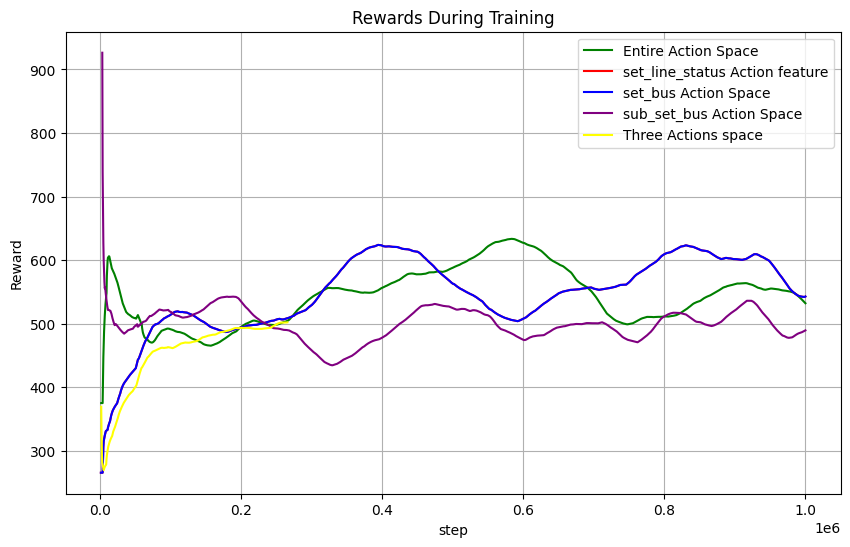

Max Length of All Action feature space  3064.333251953125
Max Length of set_line_status Action feature  1951.9599609375
Max Length of set_bus Action feature  1951.9599609375
Max Length of sub_set_bus Action feature  2821.0
Max Length of Three Action features  1615.8499755859375


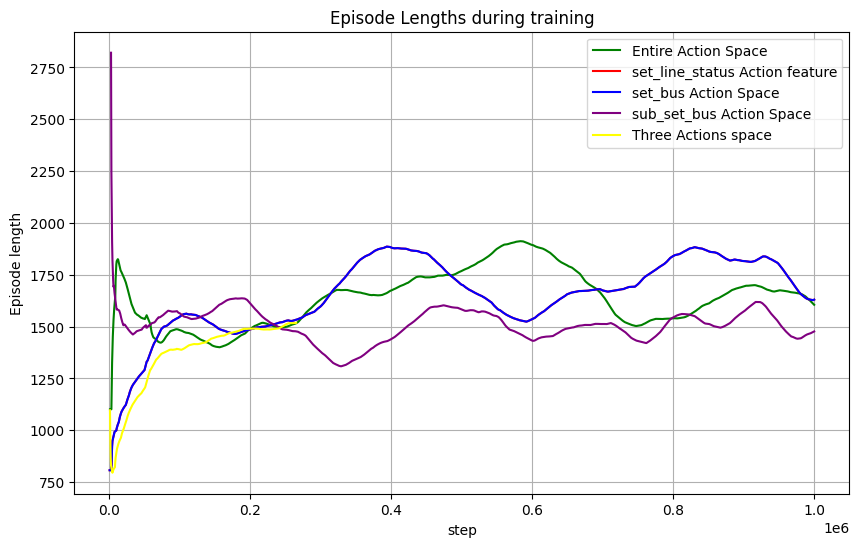

In [29]:


read_reward_files_five("/mnt/c/Users/lukek/OneDrive/Desktop/Computer Science Honours/RL/RL-Assignment/src/actor_critic/Extracted csvs/rollout_ep_rew_mean_All_ao.csv",
           "/mnt/c/Users/lukek/OneDrive/Desktop/Computer Science Honours/RL/RL-Assignment/src/actor_critic/Extracted csvs/rollout_ep_rew_mean_set_line_status.csv",
           "/mnt/c/Users/lukek/OneDrive/Desktop/Computer Science Honours/RL/RL-Assignment/src/actor_critic/Extracted csvs/rollout_ep_rew_mean_set_bus.csv",
           "/mnt/c/Users/lukek/OneDrive/Desktop/Computer Science Honours/RL/RL-Assignment/src/actor_critic/Extracted csvs/rollout_ep_rew_mean_sub_set_bus.csv",
           "/mnt/c/Users/lukek/OneDrive/Desktop/Computer Science Honours/RL/RL-Assignment/src/actor_critic/Extracted csvs/rollout_ep_rew_mean_3a.csv")

read_length_files_five("/mnt/c/Users/lukek/OneDrive/Desktop/Computer Science Honours/RL/RL-Assignment/src/actor_critic/Extracted csvs/rollout_ep_len_mean_MDA_All_ao.csv",
           "/mnt/c/Users/lukek/OneDrive/Desktop/Computer Science Honours/RL/RL-Assignment/src/actor_critic/Extracted csvs/rollout_ep_len_mean_set_line_status.csv",
           "/mnt/c/Users/lukek/OneDrive/Desktop/Computer Science Honours/RL/RL-Assignment/src/actor_critic/Extracted csvs/rollout_ep_len_mean_set_bus.csv",
           "/mnt/c/Users/lukek/OneDrive/Desktop/Computer Science Honours/RL/RL-Assignment/src/actor_critic/Extracted csvs/rollout_ep_len_mean_sub_set_bus.csv",
           "/mnt/c/Users/lukek/OneDrive/Desktop/Computer Science Honours/RL/RL-Assignment/src/actor_critic/Extracted csvs/rollout_ep_len_mean_3a.csv")